In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Работа с числовыми значениями и пропусками**

In [8]:
## В ходе pd.to_numeric(df['TotalCharges']) получено "ValueError: Unable to parse string " " at position 488". Если вывести строку с таким индексом получим пустую строку с пробелом.
## Это и есть причина того, почему тип столбйа TotalCharges записан как object


df['TotalCharges'].iloc[488]

' '

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [11]:
df['TotalCharges'].isnull().sum()

np.int64(11)

Text(0, 0.5, 'Количество')

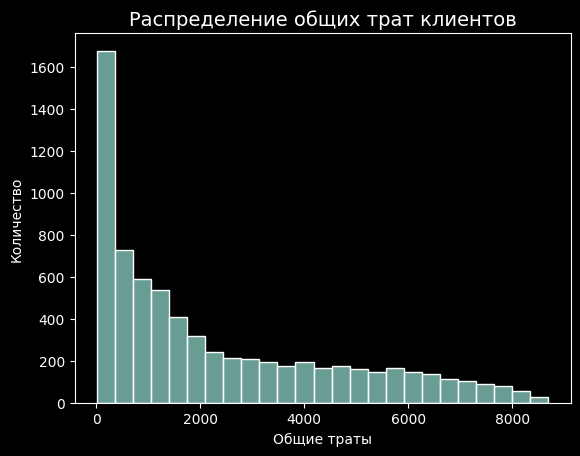

In [12]:
sns.histplot(df['TotalCharges'])
plt.title('Распределение общих трат клиентов', fontsize=14)
plt.xlabel('Общие траты')
plt.ylabel('Количество')

In [13]:
# df = df.dropna(subset=['TotalCharges'])

**Работа с категориальными столбцами**

In [14]:
# df = df.drop('customerID', axis=1)

In [15]:
# categorical_cols = df.select_dtypes(include='object').columns
# categorical_cols

In [16]:
# for col in categorical_cols:
#     print(f'Количество уникальных вхождений в столбце {col} - {df[col].nunique()}: {df[col].unique()}')

In [17]:
# df[categorical_cols] = df[categorical_cols].replace({'No phone service':'No', 'No internet service':'No'})

In [18]:
# binary_cols = df[categorical_cols].nunique() == 2
# binary_cols = binary_cols[binary_cols].index

In [19]:
# df[binary_cols] = df[binary_cols].replace({'Yes':1, 'No':0, 'Male':1, 'Female':0})
# df[binary_cols] = df[binary_cols].astype(int)

In [20]:
# not_binary_cols = df[categorical_cols].nunique() > 2
# not_binary_cols = not_binary_cols[not_binary_cols].index

In [21]:
# for col in categorical_cols:
#     print(f'Количество уникальных вхождений в столбце {col} - {df[col].nunique()}: {df[col].unique()}')

In [22]:
# df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [23]:
# df.columns

In [24]:
# df.head()

**Feature extraction**

In [25]:
# df['tenure'].hist()

In [26]:
# df['tenure_years'] = df['tenure'] // 12

In [27]:
# df['tenure_group'] = pd.cut(df['tenure'], bins=[-1, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

In [28]:
# df[['MonthlyCharges', 'TotalCharges']].head()

In [29]:
# df['avg_MonthlyCharges'] = df['TotalCharges']/df['tenure'].replace(0, 1)

In [30]:
# service_with_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [31]:
# df['num_service_with_internet'] = df[service_with_internet].sum(axis=1)

In [32]:
# df['is_automatic_PaymentMethod'] = df[['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)']].sum(axis=1)

In [33]:
# df['is_long_Contract'] = df[['Contract_One year', 'Contract_Two year']].sum(axis=1)

In [34]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Анализ данных**

In [36]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Text(0, 0.5, 'Количество')

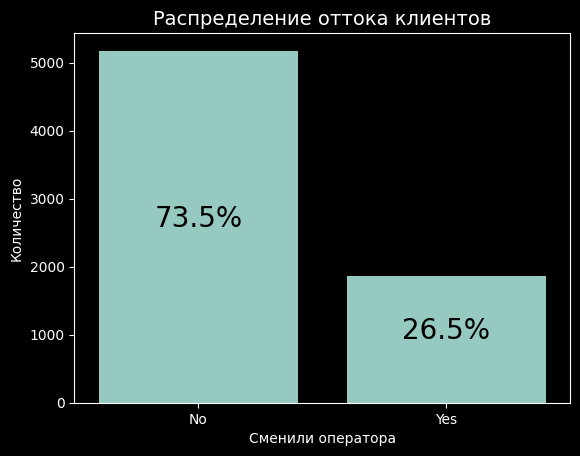

In [59]:
churn_plot = sns.countplot(data=df, x='Churn')

for p in churn_plot.patches:
    count = p.get_height()
    prcent = count/len(df)*100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    churn_plot.annotate(f'{prcent:.1f}%', (x, y/2), ha='center', color='black', fontsize=20)


plt.title('Распределение оттока клиентов', fontsize=14)
plt.xlabel('Сменили оператора')
plt.ylabel('Количество')

Виден сильный дисбаланс классов. Приблизительно, 26.5% клиентов хотят сменить телеком компанию, в то время как 73,5% предпочли не менять её.

In [60]:
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).reset_index()
churn_by_gender

,gender,Churn,proportion
0,Female,No,0.730791
1,Female,Yes,0.269209
2,Male,No,0.738397
3,Male,Yes,0.261603


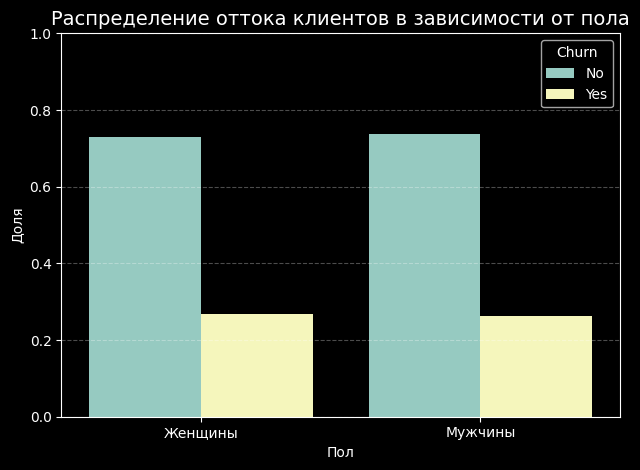

In [69]:
gender_churn_plot = sns.barplot(data=churn_by_gender, x='gender', y='proportion', hue='Churn')
plt.title('Распределение оттока клиентов в зависимости от пола', fontsize=14)
plt.xlabel('Пол')
gender_churn_plot.set_xticks([0, 1])
gender_churn_plot.set_xticklabels(['Женщины', 'Мужчины'])
plt.ylabel('Доля')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

Доля мужчин и женщин, ушедших от оператора, примерно одинаковое.

In [41]:
df['SeniorCitizen'].value_counts(normalize=True)

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

In [67]:
churn_by_senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).reset_index()
churn_by_senior

,SeniorCitizen,Churn,proportion
0,0,No,0.763938
1,0,Yes,0.236062
2,1,No,0.583187
3,1,Yes,0.416813


(0.0, 1.0)

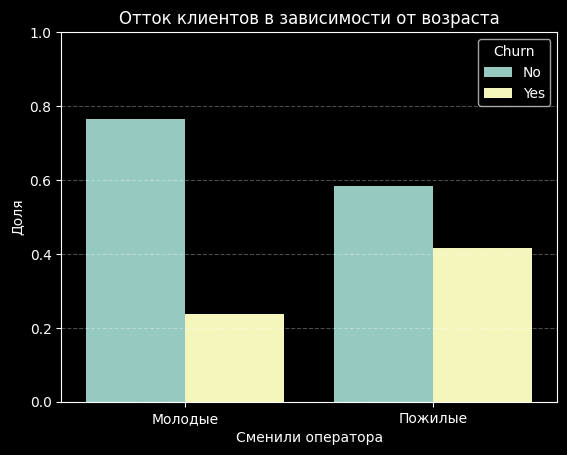

In [72]:
senior_churn_plot = sns.barplot(data=churn_by_senior, x='SeniorCitizen', y='proportion', hue='Churn')
plt.title('Отток клиентов в зависимости от возраста')
plt.xlabel('Сменили оператора')
senior_churn_plot.set_xticks([0, 1])
senior_churn_plot.set_xticklabels(['Молодые', 'Пожилые'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Доля')
plt.ylim(0, 1)

Приблизительно 83,8% пользователей являются молодыми. Среди них доля оттока составляет 23,6%. У пожилых клиентов, которые составляют 16,2% аудитории, отток достигает 41,6%, что почти в два раза выше по сравнению с молодыми.
Хотя в абсолютных значениях больше клиентов уходит среди молодых, пожилые демонстрируют существенно более высокий уровень оттока.
Поэтому необходимо принять меры по снижению оттока в обеих группах.
Возможные причины столь значительного оттока среди пожилых пользователей могут быть связаны с негативным пользовательским опытом: сложный интерфейс, большое количество тарифов, недостаток персонализированной поддержки. 
Рекомендации:
- Для пожилых: упростить интерфейс, улучшить персонализированную поддержку, предложить ограниченное количество тарифов
- Для молодых: предлагать различные бонусы, гибкие условия, инновационные сервисы. 

In [43]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [44]:
churn_by_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).reset_index()
churn_by_partner[churn_by_partner['Churn']=='Yes']

,Partner,Churn,proportion
1,No,Yes,0.329580
3,Yes,Yes,0.196649


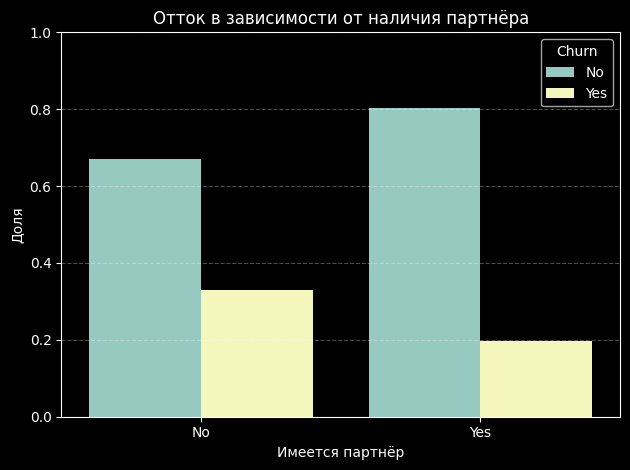

In [45]:
sns.barplot(data=churn_by_partner, x='Partner', y='proportion', hue='Churn')
plt.title('Отток в зависимости от наличия партнёра')
plt.xlabel('Имеется партнёр')
plt.ylabel('Доля')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

У клиентов без партнёра вероятность оттока на ~13,2% выше, чем у клиентов с партнёром. 

In [46]:
churn_by_dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=True).reset_index()
churn_by_dependents

,Dependents,Churn,proportion
0,No,No,0.687209
1,No,Yes,0.312791
2,Yes,No,0.845498
3,Yes,Yes,0.154502


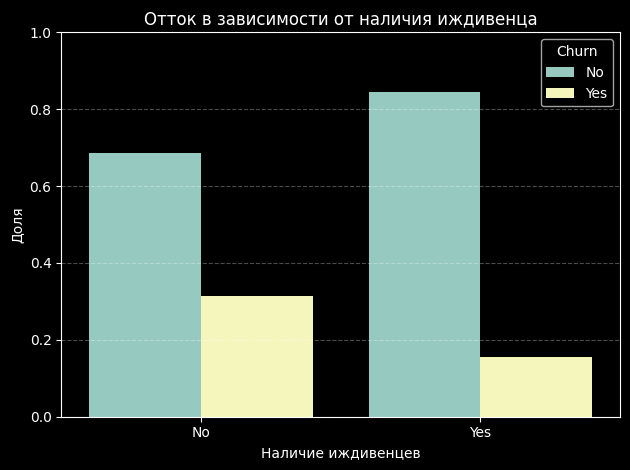

In [47]:
sns.barplot(data=churn_by_dependents, x='Dependents', y='proportion', hue='Churn')
plt.title('Отток в зависимости от наличия иждивенца')
plt.ylabel('Доля')
plt.xlabel('Наличие иждивенцев')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

Наличие иждивенцев может быть признаком большей стабильности:
- Клиенты менее склонны к смене оператора.
- Могут использовать услуги всей семьёй (например, семейные тарифы).

Отсутствие иждивенцев чаще наблюдается у мобильных и гибких клиентов, которые активнее ищут выгодные условия.

In [48]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [49]:
df.groupby('Contract')['Churn'].value_counts(normalize=True)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887305
                Yes      0.112695
Two year        No       0.971681
                Yes      0.028319
Name: proportion, dtype: float64

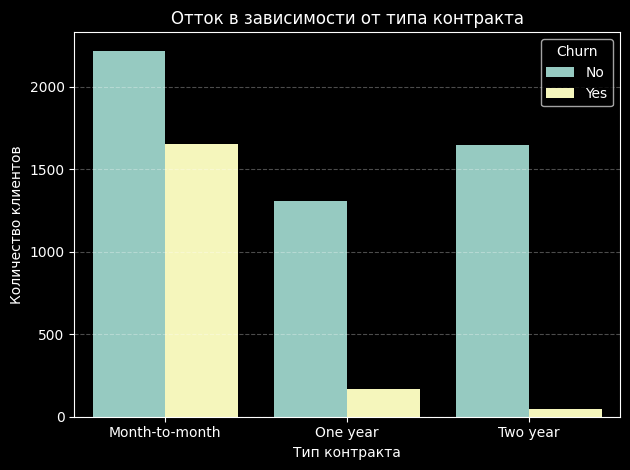

In [73]:
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Отток в зависимости от типа контракта')
plt.xlabel('Тип контракта')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

Наименьший процент оттока у клиентов с контрактом в 2 года (2,8% от общего количества клиентов с контрактом на 2 года). Наибольший процент оттока (приблизительно 42,7%) у пользователей с контраком месяц на месяц. Причинами этих наблюдений может быть следующим. Пользователь доверяет компании и готов заключать с ней длительные контракты на 1-2 года. Контракт месяц на месяц хоть и остаётся самым популярным, но у пользователей появляется больше озможностей сменить другого оператора, если будут предложены более выгодные условия.

In [53]:
churn_by_phoneservice = df.groupby('PhoneService', as_index=False)['Churn'].value_counts(normalize=True)
churn_by_phoneservice

,PhoneService,Churn,proportion
0,No,No,0.750733
1,No,Yes,0.249267
2,Yes,No,0.732904
3,Yes,Yes,0.267096


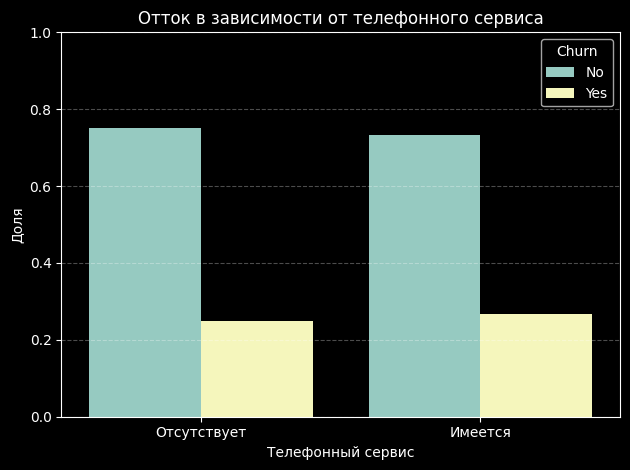

In [74]:
phoneservice_plot = sns.barplot(data=churn_by_phoneservice, x='PhoneService', y='proportion', hue='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.3)
phoneservice_plot.set_xticks([0, 1])
phoneservice_plot.set_xticklabels(['Отсутствует', 'Имеется'])
plt.title('Отток в зависимости от телефонного сервиса')
plt.xlabel('Телефонный сервис')
plt.ylabel('Доля')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
churn_by_paymentmethod = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
churn_by_paymentmethod

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832902
                           Yes      0.167098
Credit card (automatic)    No       0.847569
                           Yes      0.152431
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.808933
                           Yes      0.191067
Name: proportion, dtype: float64